## Introduction to Machine Learning
In this exercise we will study use of linear regression to approximate nonlinear functions. Further we will focus on understanding the goal of learning by analyzing loss and risk as discussed in lecture.

For some data $\mathbf{x}$ and unknown function $\mathbf{y}$ target function is defined as

$t = y(\mathbf{x},\mathbf{w}) + \epsilon$

where w is an estimator matrix and epsilon is a prediction error. The assumption that features in data x are IID random variables allows to model epsilon as a gaussian distribution noise.

The general linear regression model is defined as:

 $y(\mathbf{x},\mathbf{w}) = \sum_{j=0}^{M-1} w_j\mathbf{x} = \mathbf{w}^T\mathbf{x}$
 
  where $\mathbf{x}$ is a $M$ dimensional feature vector, $\mathbf{w}$ is a set of parameter to be estimated.
  
  To estimate target $\mathbf{t}$ we define a loss function referred as Empirical Risk:
  
  $L = \sum_{j=0}^{N-1}(y(\mathbf{x^{(j)}},\mathbf{w})-t^{(j)})^2$
  
  Now our objective is to find the parameters $\mathbf{w}$ such that loss $\mathbf{L}$ is minimum. To perform the minimization we take derivative of  $\mathbf{L}$  with respect to the parameter $\mathbf{w}$ and eqaute it to zero. Further simplifying the equation we get following solution for $\mathbf{w}$:
  
   $\mathbf{w}_{ML} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t}$ 
  
  where $\mathbf{X}$ is the $N \times M$ feature matrix and $\mathbf{t}$ is the $N \times 1$ target vector.
  
  In the programming part we will simulate some random data and fit a linear regression model. Further we will analyze two different effects. 
   
  (i) Underfitting: model is not sufficient to fit the data. It ignores important, discriminative features of data thus resulting in under generalization. Underfit model has very high empirical risk. It usually means model is not learning.
  
  (ii)Overfitting: model very precisely captures noise of data thus resulting in over generalization. Overfit model has a very low empirical risk. 
   
  

weight= [ 0.73374024]
weight= [  7.32820371e-01   1.76771779e+00   6.76372515e-04]
weight= [  3.29926124e-01   2.61054175e+00   1.08371482e+01   3.19078190e-01
  -4.93539423e+01  -4.64886120e+00   9.36277932e+01   7.38164740e+00
  -9.17252746e+01  -4.60779055e+00   4.99195690e+01   1.32749774e+00
  -1.51798564e+01  -1.72427021e-01   2.40796114e+00   7.64122873e-03
  -1.54974582e-01]


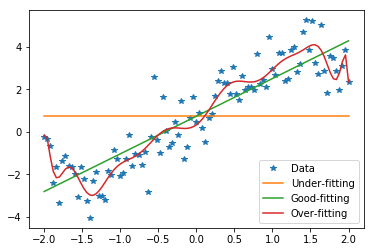

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import math

seed = 123456789
np.random.seed(seed)

def y(x, w1, w2, w3, mu=0, sigma=1): 
    return w1*np.sin(x) + w2*np.cos(x) + w3 + np.random.normal(mu,sigma,1)[0]

def polynomial_features(x,pow):
    temp = x
    for i in range(pow-1):
        temp = temp * x
    return temp

def prediction(params, x):
    pred = 0
    for i in range(len(params)):
        pred += params[i]*math.pow(x,i)
    return pred
#Data with N points
N = 101
data_Y = np.empty(N)
data_X = np.linspace(-2,2,N)
for i in range(N): 
    data_Y[i] = y(x=data_X[i], w1=2.89, w2 = 0.5, w3=0.4)


def fit_model(degree, data_X):
    X = [np.ones(N)]
    for i in range(1,degree):
        X.append(polynomial_features(data_X, i))
    #X Matrix wit polynomial features, N X M
    X = np.array(X).T
    W = np.dot(np.dot(np.linalg.pinv(np.dot(X.T,X)), X.T), data_Y) #solution
    print('weight=',W)
    predicted_Y = [prediction(W,x) for x in data_X]
    return predicted_Y

# Plot Data
plt.plot(data_X,data_Y,'*')

#Underfit
predicted_Y1 = fit_model(1, data_X) 
plt.plot(data_X, predicted_Y1)

#Goodfit
predicted_Y2 = fit_model(3, data_X) 
plt.plot(data_X, predicted_Y2)

#Overfit
predicted_Y3 = fit_model(17, data_X) 
plt.plot(data_X,predicted_Y3)
plt.legend(('Data','Under-fitting','Good-fitting','Over-fitting'), loc='lower right')
plt.show()

In above example we analyzed the effect of under-fitting and over-fitting on data. We observed overfit model despite of having a low empirical risk does not generalize well. 
In next part we will study an important technique to adjust the fitting capacity of model. It helps in preventing model from over generalization.

## Regularization To Control Overfitting

Regularization is done to address problem of overfitting for a given model. Regularization adds a penality on parameters of model thus ruling out high complexity models. Here loss function implements structural risk minimization (SRM) principle. SRM helps in finding a simplest model with best empirical error. The general loss function with a regularization term is given by 

$L = E_D(\mathbf{w}) + \lambda E_W(\mathbf{w})$

where $\lambda$ is the regularization coefficient and $E_W$ is the regularization term. In this example we will use sum-of-squares of the model parameters also known as <em>weight decay</em> regularizer.

 $E_W(\mathbf{w}) = \frac1{2}\mathbf{w}^T\mathbf{w}$
 
 Solving the loss function in an earlier fashion we obtain following solution for linear regression model.
 
 $\mathbf{w} = \left(\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I} \right)^{-1} \mathbf{X}^T\mathbf{t}$

weight= [ 0.73075846  2.27836434  0.65678733 -0.15895026 -0.63134705 -0.09267119
 -0.61198317  0.285037    0.10857908  0.22509879  0.75697917 -0.33801256
 -0.52248194  0.11251554  0.12734434 -0.01160577 -0.01071163]


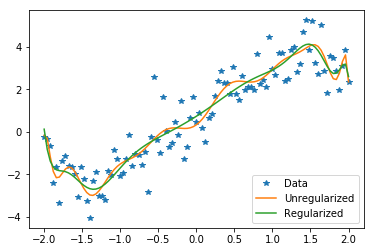

In [3]:
def fit_regularized_model(degree, la, data_X):
    X = [np.ones(N)]
    for i in range(1,degree):
        X.append(polynomial_features(data_X, i))
    #X Matrix wit polynomial features, N X M
    X = np.array(X).T
    M = np.shape(X)[1]
    W = np.dot(np.dot(np.linalg.pinv(np.dot(X.T,X) + la*np.eye(M)), X.T), data_Y) #solution
    print('weight=',W)
    predicted_Y = [prediction(W,x) for x in data_X]
    return predicted_Y
# Data Poit
plt.plot(data_X, data_Y, '*')
# Without Regularization
plt.plot(data_X, predicted_Y3)
predicted_Y4 = fit_regularized_model(17, 0.3, data_X) 
# With Regularization
plt.plot(data_X, predicted_Y4)
plt.legend(('Data','Unregularized','Regularized'), loc='lower right')
plt.show()